# 📅 Day 3 — Exploratory Data Analysis (EDA)

![EDA](https://github.com/ValRCS/RTU_Data_Analysis_Visualization_CPD/blob/main/img/icons/EDA.png?raw=true)

## EDA – Importance and Meaning

Exploratory Data Analysis (EDA) is the process of **getting to know your dataset** before applying advanced models or drawing conclusions.  
It is a critical step in any data analysis workflow (after initial acquisition, cleaning and preparation) because it helps you:

- **Understand structure**: Identify variable types (numerical, categorical, date, text) and the shape of the dataset.  
- **Detect issues**: Spot missing values, inconsistencies, and potential data quality problems.  
- **Summarize key statistics**: Compute central tendencies, spread, correlations, and distributions to build intuition.  
- **Reveal patterns**: Use plots and summaries to see trends, clusters, and group differences.  
- **Identify anomalies**: Highlight unusual points or outliers that may skew results.  
- **Guide decisions**: Inform which cleaning, transformation, or modeling approaches make sense for the dataset.  

Think of EDA as the **detective work** of data analysis. Instead of jumping into advanced models right away, you first explore the dataset to generate hypotheses, validate assumptions, and prepare the ground for deeper analysis.


## Titanic – The Story We Know

![Titanic](https://upload.wikimedia.org/wikipedia/commons/thumb/6/6e/St%C3%B6wer_Titanic.jpg/600px-St%C3%B6wer_Titanic.jpg)

The RMS Titanic was one of the largest and most luxurious ocean liners of its time, celebrated as “unsinkable” when it set sail on its maiden voyage from Southampton to New York in April 1912. Tragically, on the night of April 14th, the ship struck an iceberg in the North Atlantic and sank in the early hours of April 15th. Of the more than 2,200 passengers and crew aboard, over 1,500 lost their lives, making it one of the deadliest peacetime maritime disasters in history.

The Titanic disaster has been studied for decades, not only as a historical event but also as a data source. Passenger records — including age, gender, class, ticket fare, and survival outcome — were compiled from official lists and archives. Today, these records form the basis of the famous **Titanic dataset**, widely used in teaching data analysis and machine learning. It allows us to explore how social and economic factors influenced survival, offering a powerful case study in how data can tell human stories.



## 🛳 The Titanic Dataset

The **Titanic dataset** records information about passengers aboard the RMS Titanic.
It contains a mix of **numerical** and **categorical** variables, as well as **missing data**, **outliers**,
and a **binary target variable** (survival).

We will use Seaborn's built-in Titanic dataset (~891 rows, 15 columns).


## Seaborn – Statistical Data Visualization in Python

[Seaborn](https://seaborn.pydata.org/) is a Python library built on top of **matplotlib** that makes it easier to create clear, attractive, and informative statistical visualizations.  
It comes with **high-level functions** for common plot types such as histograms, scatterplots, boxplots, heatmaps, and regression plots, while handling details like color palettes and axis formatting automatically.  

In this course, we use Seaborn to:
- Quickly explore **distributions** (age, fare)  
- Compare **categories** (survival by sex, class)  
- Visualize **correlations** (heatmaps of numerical features)  
- Highlight **outliers and patterns** in the Titanic dataset  

### Seaborn in Google Colab
Google Colab includes Seaborn **pre-installed**, so you can simply import and use it without setup:

```python
import seaborn as sns
import matplotlib.pyplot as plt


In [1]:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load Titanic dataset from seaborn
titanic = sns.load_dataset("titanic")
titanic.head()


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True



### Key Features in the Seaborn Version
- **survived**: Whether the passenger survived (0 = No, 1 = Yes)  
- **pclass**: Passenger class (1st, 2nd, 3rd)  
- **sex**: Male or female  
- **age**: Age of passenger in years  
- **sibsp**: Number of siblings/spouses aboard  
- **parch**: Number of parents/children aboard  
- **fare**: Ticket fare (in British pounds)  
- **embarked**: Port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton)  
- **class**: Duplicate categorical version of `pclass`  
- **who**: Man, woman, or child (based on sex and age)  
- **deck**: Cabin deck (many missing)  
- **embark_town**: Full name of embarkation port  
- **alive**: Duplicate categorical version of `survived`  
- **alone**: Whether passenger was alone or not  


## 📚 Instruction (3h)

### 1. Descriptive Statistics


#### Measures of Central Tendency: Mean, Median, Mode
We use measures like mean, median, and mode to summarize central tendencies in data.
For example, average passenger age or the most common embarkation port.

#### Refresher of your statistics

* mean - the average value of a numerical variable
* median - the middle value when data is sorted
* mode - the most frequently occurring value in a variable


In [ ]:

# Mean, Median, Mode examples
print("Mean age:", titanic['age'].mean())
print("Median age:", titanic['age'].median())
print("Mode embark_town:", titanic['embark_town'].mode()[0])


Mean age: 29.69911764705882
Median age: 28.0
Mode embark_town: Southampton


## Mean, Median, Mode – When to Use Which?

When analyzing data, the **mean**, **median**, and **mode** are three key measures of central tendency. Each highlights a different aspect of the "typical" value in a dataset, and each has strengths and weaknesses depending on the context.

- **Mean (average)** is best when the data is **continuous, symmetric, and free of extreme outliers**. For example, the average age of Titanic passengers gives a good sense of the general group, but it would be skewed if just a few passengers had extremely high ages recorded incorrectly.  
- **Median (middle value)** is preferred when data is **skewed or contains outliers**, because it is more robust. In the Titanic dataset, the **median fare** is much lower than the mean fare, since a few wealthy first-class passengers paid disproportionately high prices.  
- **Mode (most frequent value)** is especially useful for **categorical or discrete data**. For instance, the mode of `embarked` tells us the most common port of departure, or the mode of `pclass` reveals the most common travel class. For numerical data, mode is less often used unless the data is heavily discrete (e.g., number of siblings).

In practice:
- Use the **mean** for normally distributed data without large outliers.  
- Use the **median** when distributions are skewed or when robustness is needed.  
- Use the **mode** when dealing with categorical or discrete variables where frequency matters.  

Together, these three measures provide a more complete picture of a dataset’s central tendency than any one measure alone.



#### Measures of Spread: Variance, Standard Deviation, Quartiles
Spread measures help us understand variability in the dataset.
Titanic fares vary widely across classes.

#### Refresher of your statistics

* variance - the average of the squared differences from the mean
* standard deviation - the square root of variance, indicating typical deviation from the mean
* quartiles - values that divide the data into four equal parts (Q1, Q2/median, Q3, IQR)

In [ ]:

print("Fare variance:", titanic['fare'].var())
print("Fare standard deviation:", titanic['fare'].std())
print("Fare quartiles:")
print(titanic['fare'].describe()[4:7])


Fare variance: 2469.436845743117
Fare standard deviation: 49.693428597180905
Fare quartiles:
25%     7.9104
50%    14.4542
75%    31.0000
Name: fare, dtype: float64


## Measures of Spread: Variance, Standard Deviation, Quartiles – When to Use Which?

While measures of central tendency tell us the "typical" value, **measures of spread** describe how much the data varies. They show whether the values are tightly clustered or widely dispersed. The three most common measures are **variance**, **standard deviation**, and **quartiles**.

- **Variance** measures the *average squared deviation* from the mean. It is mathematically important in statistics and probability theory, especially in advanced modeling. However, because it is expressed in squared units (e.g., age²), it is less intuitive to interpret directly.  

- **Standard Deviation (SD)** is the square root of variance and is expressed in the same units as the data. This makes it much easier to interpret. A low SD means the data points are close to the mean, while a high SD indicates more spread. For Titanic, the **standard deviation of fare** shows how widely ticket prices varied among passengers.  

- **Quartiles and Interquartile Range (IQR)** divide the dataset into four equal parts. Q1 is the 25th percentile, Q2 is the median, and Q3 is the 75th percentile. The **IQR (Q3 – Q1)** captures the middle 50% of data, making it very robust against outliers. On Titanic, quartiles are useful for understanding the distribution of fares across different classes, where extreme values (luxury fares) would distort the mean and SD.

### When to Use Which?
- Use **variance** in theoretical or mathematical contexts, especially when working with probability distributions or regression models.  
- Use **standard deviation** when you need a practical, intuitive measure of spread in the same units as your data.  
- Use **quartiles and IQR** when data is skewed or has outliers, as they provide a resistant summary of distribution.  

In practice, analysts often report both **median + IQR** (robust view) and **mean + SD** (classical view) to give a balanced picture of spread.



#### Skewness & Kurtosis
Skewness shows asymmetry in distributions, while kurtosis measures tail heaviness.

#### Refresher of your statistics

* skewness - a measure of asymmetry in a distribution (positive = right tail, negative = left tail)
* kurtosis - a measure of the "tailedness" of a distribution (high kurtosis = heavy tails, low kurtosis = light tails)

More on formulas for these on wiki:
* https://en.wikipedia.org/wiki/Skewness
* https://en.wikipedia.org/wiki/Kurtosis


In [ ]:

print("Fare skewness:", titanic['fare'].skew())
print("Fare kurtosis:", titanic['fare'].kurt())


Fare skewness: 4.787316519674893
Fare kurtosis: 33.39814088089868


### Interpretation of Skewness and Kurtosis
- **Skewness**: A skewness value greater than 0 indicates a right-skewed distribution, while a value less than 0 indicates a left-skewed distribution. A value close to 0 suggests a symmetric distribution.
- **Kurtosis**: A kurtosis value greater than 3 indicates a distribution with heavier tails than a normal distribution (leptokurtic), while a value less than 3 indicates lighter tails (platykurtic). A kurtosis of exactly 3 corresponds to a normal distribution (mesokurtic).

## Skewness and Kurtosis – When to Use Which?

Beyond central tendency and spread, it is also important to understand the **shape of a distribution**. Two key measures for this are **skewness** and **kurtosis**.

- **Skewness** measures the asymmetry of a distribution:  
  - A **skewness near 0** means the data is roughly symmetric (like a bell curve).  
  - **Positive skew** means the right tail is longer (e.g., Titanic fares: many passengers paid small amounts, but a few paid very high amounts).  
  - **Negative skew** means the left tail is longer (rare, but can occur in age if most passengers are older but a few very young drag the tail down).  
  Skewness is useful when you need to decide whether to apply transformations (like log-transforming highly skewed variables) before modeling.

- **Kurtosis** measures the "tailedness" or concentration of data in the extremes compared to a normal distribution:  
  - **Normal distribution** has kurtosis ≈ 0 (if using Fisher’s definition) or 3 (if using Pearson’s).  
  - **High kurtosis (leptokurtic)** means heavy tails and more outliers (Titanic fares again show this).  
  - **Low kurtosis (platykurtic)** means light tails and fewer outliers than normal.  
  Kurtosis is useful for assessing the presence of outliers and how extreme values may influence analysis.

### When to Use Which?
- Use **skewness** when you want to check for asymmetry and decide on transformations to make data more normal.  
- Use **kurtosis** when evaluating whether outliers are likely and how “peaked” or “flat” your distribution is compared to normal.  
- Both are most useful in **EDA before modeling**, especially when considering regression, correlation, or machine learning methods that assume normality.  

In practice, **skewness highlights direction of imbalance**, while **kurtosis highlights the weight of the tails**. Together, they help you understand if your data matches the assumptions of common statistical techniques or if adjustments are needed.


### Descriptive Statistics versus Visualizations

- Descriptive statistics provide numerical summaries of data, while visualizations offer graphical representations.
- Statistics give precise measures (e.g., mean, median), while visualizations reveal patterns, trends, and outliers.
- Both are complementary: statistics quantify, while visualizations illustrate.



## Anscombe’s Quartet – Why Visualization Matters

In 1973, statistician Francis Anscombe created four small datasets, now known as **Anscombe’s Quartet**, to highlight the importance of visualization in data analysis.  

![Quarter](https://upload.wikimedia.org/wikipedia/commons/thumb/e/ec/Anscombe%27s_quartet_3.svg/960px-Anscombe%27s_quartet_3.svg.png)

Each dataset has (almost) identical **summary statistics**:  
- Same mean of x and y  
- Same variance of x and y  
- Same correlation between x and y  
- Same linear regression line  

Yet, when plotted, they look completely different:  
1. A nearly perfect linear relationship  
2. A clear non-linear curve  
3. A dataset where one outlier changes interpretation  
4. A dataset with a single influential point that drives the regression  

👉 The lesson: **statistics alone can be misleading**. Without visualization, we may miss underlying patterns, clusters, or anomalies.  

This concept is often extended with the **Datasaurus Dozen**, a modern set of datasets shaped like a dinosaur 🦖, star, or circle, all sharing very similar summary statistics but dramatically different shapes when plotted.  

**Key takeaway:** Always visualize your data during EDA — it may tell a very different story than the numbers suggest.


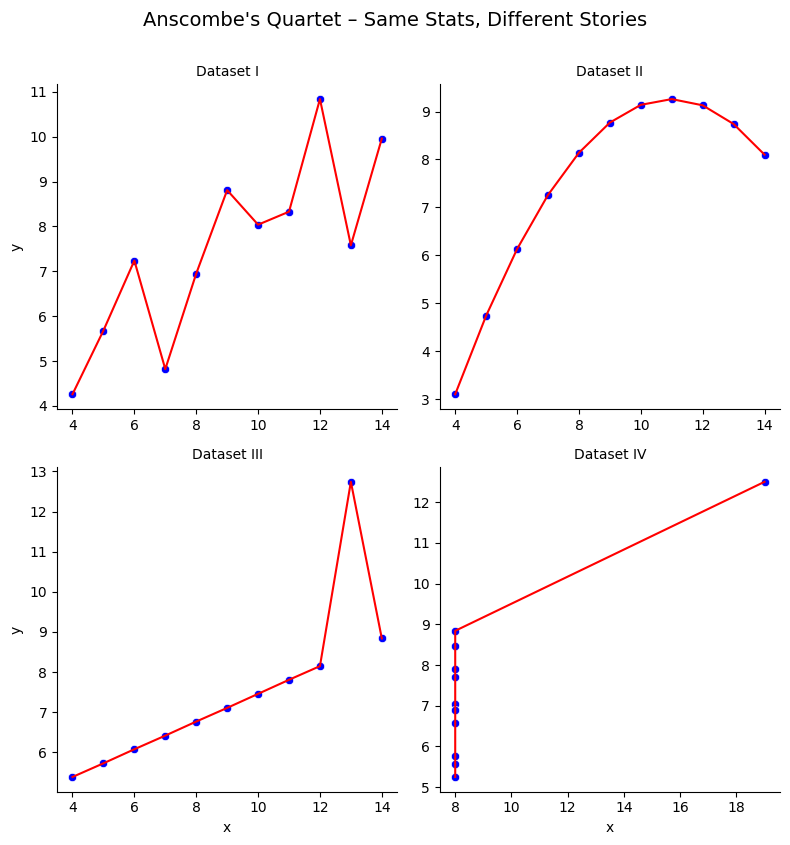

In [2]:
# Load Anscombe's Quartet dataset (built into Seaborn)
anscombe = sns.load_dataset("anscombe")

# Create FacetGrid: one plot per dataset (I, II, III, IV)
g = sns.FacetGrid(anscombe, col="dataset", col_wrap=2, height=4, sharex=False, sharey=False)
g.map_dataframe(sns.scatterplot, x="x", y="y", color="blue")
g.map_dataframe(sns.lineplot, x="x", y="y", color="red", estimator=None)  # regression line (for demo)

# Add titles
g.set_titles("Dataset {col_name}")
g.set_axis_labels("x", "y")
plt.suptitle("Anscombe's Quartet – Same Stats, Different Stories", y=1.05, fontsize=14)
plt.show()

## The Datasaurus Dozen – Same Stats, Wildly Different Shapes

Building on the lesson of Anscombe’s Quartet, the **Datasaurus Dozen** is a modern collection of datasets created by Justin Matejka and George Fitzmaurice (2017). Each dataset has nearly identical **summary statistics** (same mean, standard deviation, and correlation), yet the points form dramatically different shapes when plotted.

Some examples include:  
- 🦖 A dinosaur (the famous “Datasaurus”)  
- ⭐ A star  
- ⚽ A circle or bullseye  
- 📈 Random scatter that still shares the same stats  

### Why it matters
- **Summary statistics can hide important details**.  
- **Visualization reveals structure** that numbers alone cannot capture.  
- Just like with Titanic data, relying only on averages and variances may cause us to miss crucial patterns.  

The Datasaurus Dozen reminds us that **EDA is not just about numbers — it’s about seeing the data.**  

👉 Key takeaway: Always plot your data. The shape, clusters, and outliers tell a story that summary measures cannot.


### 2. Distribution Exploration

#### Histograms

Histograms show the distribution of numerical variables.
For example, the age distribution of Titanic passengers.

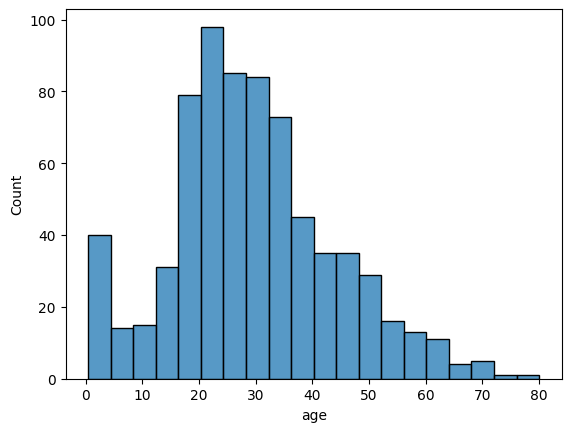

In [ ]:
sns.histplot(titanic['age'].dropna(), bins=20, kde=False);

#### Density Plots

Density plots provide a smoothed estimate of the distribution.
They help visualize the shape of the distribution without binning artifacts.

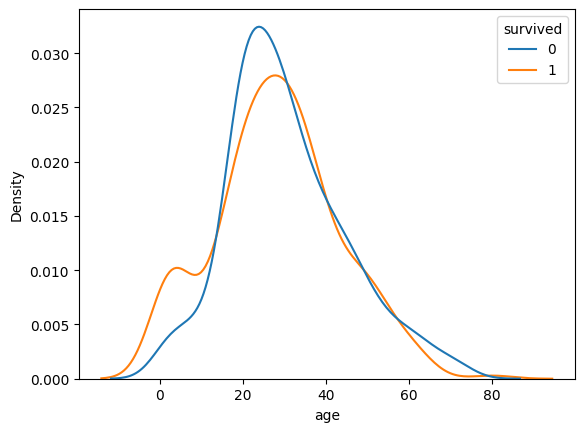

In [ ]:
sns.kdeplot(data=titanic, x='age', hue='survived', common_norm=False);

#### Boxplots

Boxplots summarize distributions and highlight outliers.
They show median, quartiles, and potential outliers in fare by passenger class.

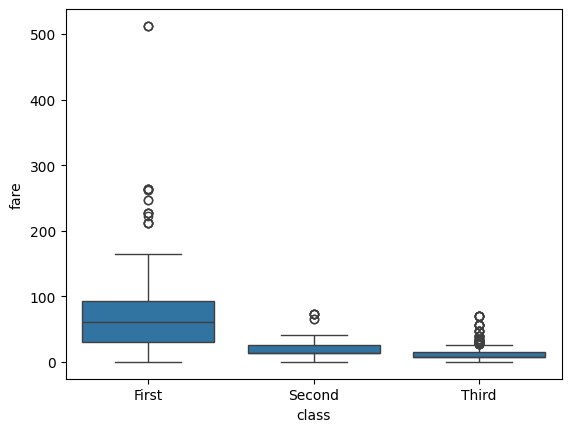

In [ ]:
sns.boxplot(data=titanic, x='class', y='fare');

### 3. Outlier Detection

#### Boxplots & Scatterplots

Boxplots and scatterplots help identify outliers in numerical data.
For instance, unusually high fares paid by some passengers.

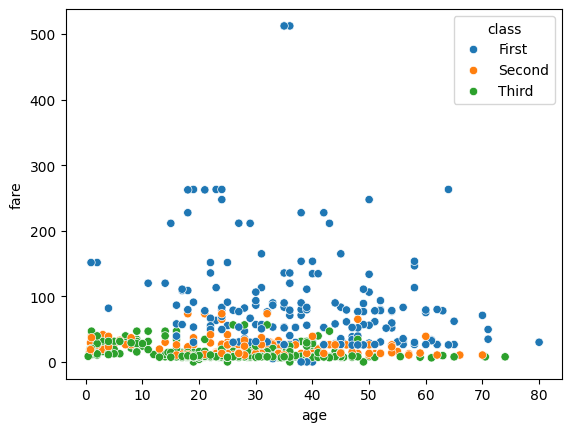

In [ ]:
sns.scatterplot(data=titanic, x='age', y='fare', hue='class');

#### IQR Method

The Interquartile Range (IQR) method identifies outliers as points below Q1 - 1.5*IQR or above Q3 + 1.5*IQR.    

Definition of IQR: IQR = Q3 - Q1, where Q1 is the first quartile (25th percentile) and Q3 is the third quartile (75th percentile).
Wiki reference: https://en.wikipedia.org/wiki/Interquartile_range

![IQR](https://upload.wikimedia.org/wikipedia/commons/thumb/1/1a/Boxplot_vs_PDF.svg/500px-Boxplot_vs_PDF.svg.png)

In [ ]:

Q1 = titanic['fare'].quantile(0.25)
Q3 = titanic['fare'].quantile(0.75)
IQR = Q3 - Q1
outliers = titanic[(titanic['fare'] < Q1 - 1.5*IQR) | (titanic['fare'] > Q3 + 1.5*IQR)]
print("Outliers count:", len(outliers))


Outliers count: 116


### 4. Correlation Analysis

Correlation measures the strength and direction of relationships between numerical variables.
#### Correlation Matrix
A correlation matrix shows pairwise correlations between numerical variables.

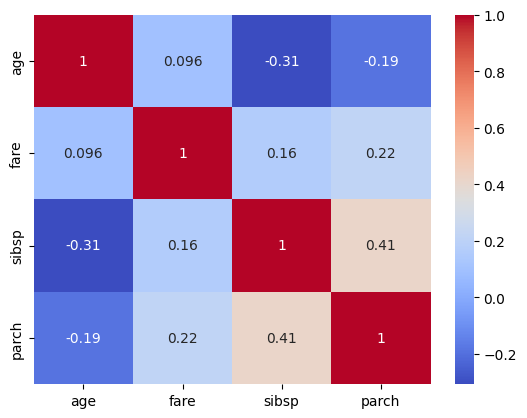

In [ ]:

corr = titanic[['age','fare','sibsp','parch']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm');


### 5. Grouping & Aggregation

Grouping and aggregation summarize data by categories.

The `groupby` function in Pandas allows you to group data by one or more categorical variables and then apply aggregation functions (like mean, sum, count) to summarize the data within each group.

#### Similarity to SQL's GROUP BY
Pandas' `groupby` function is similar to SQL's `GROUP BY` clause, allowing aggregation of data based on categorical variables.

In [ ]:

# Survival rates by sex
print(titanic.groupby('sex')['survived'].mean())

# Multiple statistics on fares by class
print(titanic.groupby('class')['fare'].agg(['mean','median','count']))


sex
female    0.742038
male      0.188908
Name: survived, dtype: float64
             mean   median  count
class                            
First   84.154687  60.2875    216
Second  20.662183  14.2500    184
Third   13.675550   8.0500    491


/tmp/ipython-input-2110100083.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(titanic.groupby('class')['fare'].agg(['mean','median','count']))


#### Pivot Tables

Pivot tables provide a multi-dimensional summary of data, allowing you to aggregate and analyze data across multiple categorical variables simultaneously.

#### Crosstab in Pandas

Crosstab is a specific type of pivot table that computes a simple cross-tabulation of two (or more) factors. It is often used to analyze the relationship between categorical variables.

Below we analyze survival rates by passenger class and gender.

In [ ]:

pd.crosstab(titanic['sex'], titanic['class'], values=titanic['survived'], aggfunc='mean')


class,First,Second,Third
sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


### 6. Missing Data Analysis

#### Identifying Missing Data

We identify missing data using functions like `isnull()` and `sum()` in Pandas.



In [ ]:
titanic.isnull().sum()

,0
survived,0
pclass,0
sex,0
age,177
sibsp,0
parch,0
fare,0
embarked,2
class,0
who,0


### 7. Chi-Squared Test for Categorical Variables

Chi-squared test assesses associations between categorical variables.

#### Chi-Squared Test Overview

- The Chi-squared test evaluates whether there is a significant association between two categorical variables.
- It compares observed frequencies in each category to the frequencies expected if there were no association.


#### Pandas `crosstab` and `chi2_contingency`

- We can use `pandas.crosstab` to create a contingency table of observed frequencies.
- The `scipy.stats.chi2_contingency` function performs the Chi-squared test on the contingency table.

#### Interpreting Chi-Squared Results

- The test returns a Chi-squared statistic, p-value, degrees of freedom, and expected frequencies.
- A low p-value (typically < 0.05) indicates a significant association between the variables.
#### Example

```python
import pandas as pd
from scipy.stats import chi2_contingency
# Create a contingency table
contingency_table = pd.crosstab(df['embarked'], df['survived'])
# Perform Chi-squared test
chi2, p, dof, expected = chi2_contingency(contingency_table)
print(f"Chi-squared: {chi2}, p-value: {p}")
# Interpret results
if p < 0.05:
    print("Significant association between embarked port and survival.")
else:
    print("No significant association between embarked port and survival.")
```

More on Chi-squared test: https://en.wikipedia.org/wiki/Chi-squared_test


## 📝 Exercise (30–45 min)

Using the Titanic dataset, complete the following tasks:

1. Compute survival rates by **embark_town** and **class**.  
2. Plot the age distribution for survivors vs non-survivors using **histograms** or **density plots**.  
3. Detect outliers in **age** using the IQR method and comment on findings.  
4. Create a new feature `family_size = sibsp + parch + 1`. Analyze its relationship with survival.  
5. Use a **pivot table** to display survival rates by **sex** and **class**. What patterns do you see?  
6. (Optional, for advanced) Perform a **chi-square test** on survival vs sex to test independence.  

### Fun - Plot the Dinosaurus Dozen

Hint: Use Gemini code generate (or other LLM tool), it should provide an easy seaborn based recipe to plot your own Dinosaurus dozen



## 🔄 Reflection

- What surprised you most about Titanic passenger survival patterns?  
- How do categorical vs numerical features require different EDA approaches?  
- How could EDA guide the next steps in modeling or prediction?  



## 📚 Additional Sources for Further EDA Work

- Wes McKinney, *Python for Data Analysis*  
- Jake VanderPlas, *Python Data Science Handbook*  
- YData Profiling: [https://ydata-profiling.ydata.ai](https://ydata-profiling.ydata.ai)  
- Seaborn Documentation: [https://seaborn.pydata.org](https://seaborn.pydata.org)  
